In [5]:
from __future__ import print_function
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas
import scipy
from statistics import mean

In [2]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

In [3]:
wvl = dataset5["11hs"].wavelengths
y_11hs = dataset5["11hs"].data
flux = y_11hs.astype('float64')
uncer = dataset5["11hs"].smooth_uncertainty['Ph4.83']

NameError: name 'fsum' is not defined

10.840000000000146

In [55]:
for i in range(wstart, wend, wbin):
    flux[i:i + wbin.sum()]

TypeError: range() integer end argument expected, got numpy.float64.

In [76]:
for i in range(4010, 6990, 10):
    fsum = flux[i:i+10].sum()

In [77]:
fsum

0.0

In [70]:
binn[1]-binn[0],binn[2]-binn[1],binn[3]-binn[2],binn[-1]-binn[-2]

(10.783705035971252,
 10.783705035971252,
 10.783705035971252,
 10.783705035971252)

In [39]:
binspect[1]-binspect[0],binspect[2]-binspect[1],binspect[3]-binspect[2],binspect[-1]-binspect[-2]

(10.840000000000146,
 10.840000000000146,
 10.840000000000146,
 10.840000000000146)

In [45]:
N=3
#i = 0
wsum = [wvl[i:i+N].sum()/N for i in range(0,len(wvl),N)]
wsum = np.asarray(wsum)

In [46]:
wsum.shape

(138,)

In [52]:
6961.84-6933.62333333, 6905.51666667-6877.52666667, 6990.17333333-6961.84 

(28.21666667000045, 27.98999999999978, 28.333333329999732)

In [15]:
N=3
i = 0
flux[i:i+10].sum()

5.300663739442825

In [51]:
414/3

138

In [31]:
N=2
i = 400
wvl[i:i+N].sum()/N

6882.18

In [12]:
(wvl[1]+wvl[0])/2

4004.48

In [16]:
wvl[0:2].sum()

8008.96

In [17]:
flux[0:2].sum()

0.8496889173984528

In [19]:
wvl[0],wvl[1]

(4001.77, 4007.19)

In [21]:
flux[0]+ flux[1]

0.8496889173984528

In [23]:
b1 = (wvl[0]+wvl[1])/2
b2 = (wvl[2]+wvl[3])/2
b2-b1

10.860000000000127

In [23]:
flux[0:2]

array([0.33257899, 0.51710993])

In [ ]:
# Summed Spectra with unpaired binns removed.

In [4]:
N = 10
nw = len(wvl)
nbins = float(nw)/N
rembin = int(nbins)
rembin2 = rembin*N
unpairedbins = nw - rembin2
def evenodd(nbin):
    if float(nbins).is_integer():
        k = (0, 0)
    else:
        if (unpairedbins % 2) == 0:
            k = (int(unpairedbins/2), int(unpairedbins/2))
        else:
            k = (int(unpairedbins/2), int(unpairedbins/2+1))
    return k
unpaired = evenodd(nbins)
l = unpaired[0]
m = unpaired[1]

In [8]:
def binspectra(wvl, flux, uncer, N):
    wnew = [wvl[i:i+N].sum()/N for i in range(0+l,len(wvl)-m,N)]
    wnew = np.asarray(wnew)
    fnew = [flux[i:i+N].sum() for i in range(0+l,len(wvl)-m,N)]
    fnew = np.asarray(fnew)
    uncernew = [np.sqrt(np.sum(np.square(uncer[i:i+N]))) for i in range(0+l,len(wvl)-m,N)]
    uncernew = np.asarray(uncernew)
    return wnew, fnew, uncernew

In [27]:
wvl = dataset5["11hs"].wavelengths
y_11hs = dataset5["11hs"].data
flux = y_11hs.astype('float64')
yerr = wvl = dataset5["11hs"].smooth_uncertainty

In [13]:
newspectra10 = binspectra(wvl, flux, uncer, N)

In [17]:
newspectra10[0].shape, newspectra10[1].shape, newspectra10[2].shape

((41,), (41,), (41,))

AttributeError: Unknown property yerr

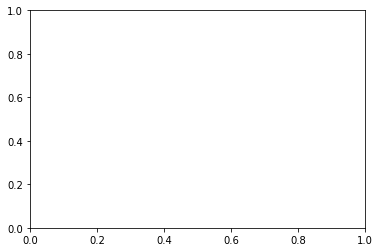

In [12]:
plt.plot(wvl, flux, c='xkcd:goldenrod', label="Original resolution")
plt.plot(newspectra10[0], newspectra10[1], c='tab:purple', label="1/10 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('11hs (5 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

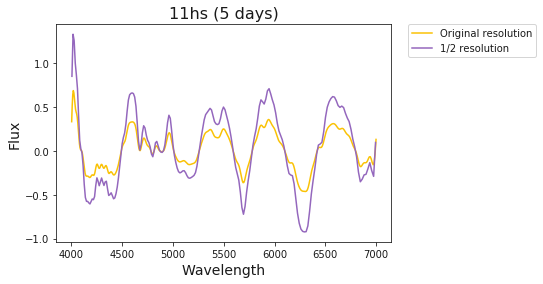

In [8]:
plt.plot(wvl, flux, c='xkcd:goldenrod', label="Original resolution")
plt.plot(newspectra[0], newspectra[1], c='tab:purple', label="1/2 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('11hs (5 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

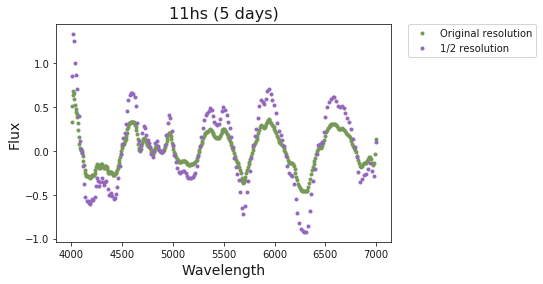

In [41]:
plt.plot(wvl, flux, 'o', markersize=3, c='xkcd:moss', label="Original resolution")
plt.plot(newspectra[0], newspectra[1], 'o', markersize=3, c='tab:purple', label="1/2 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('11hs (5 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [19]:
mean(flux)

0.01093102210184416

In [20]:
mean(newspectra[1])

0.02186204420368832

In [22]:
newspectra[0]

array([4037.173, 4092.202, 4147.977, 4204.516, 4261.822, 4319.912,
       4378.792, 4438.476, 4498.971, 4560.294, 4622.452, 4685.454,
       4749.319, 4814.053, 4879.667, 4946.179, 5013.596, 5081.93 ,
       5151.197, 5221.411, 5292.578, 5364.717, 5437.838, 5511.956,
       5587.085, 5663.237, 5740.427, 5818.67 , 5897.978, 5978.368,
       6059.854, 6142.451, 6226.172, 6311.037, 6397.056, 6484.248,
       6572.629, 6662.216, 6753.021, 6845.066, 6938.365])

In [46]:
newspectra10[0]

array([4026.256, 4081.136, 4136.762, 4193.147, 4250.299, 4308.23 ,
       4366.952, 4426.476, 4486.805, 4547.963, 4609.954, 4672.785,
       4736.477, 4801.036, 4866.472, 4932.805, 5000.04 , 5068.188,
       5137.269, 5207.292, 5278.268, 5350.21 , 5423.135, 5497.052,
       5571.978, 5647.924, 5724.905, 5802.937, 5882.03 , 5962.203,
       6043.468, 6125.842, 6209.337, 6293.973, 6379.758, 6466.715,
       6554.857, 6644.201, 6734.762, 6826.558, 6919.603, 2794.179])

In [15]:
abcd = [4026.256, 4081.136, 4136.762, 4193.147, 4250.299, 4308.23 ,
       4366.952, 4426.476, 4486.805, 4547.963, 4609.954, 4672.785,
       4736.477, 4801.036, 4866.472, 4932.805, 5000.04 , 5068.188,
       5137.269, 5207.292, 5278.268, 5350.21 , 5423.135, 5497.052,
       5571.978, 5647.924, 5724.905, 5802.937, 5882.03 , 5962.203,
       6043.468, 6125.842, 6209.337, 6293.973, 6379.758, 6466.715,
       6554.857, 6644.201, 6734.762, 6826.558, 6919.603, 2794.179]
abcd = np.asarray(abcd)

In [17]:
abcd.shape

(42,)

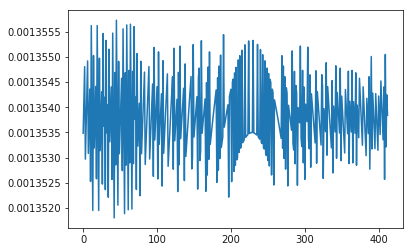

In [68]:
plt.plot(np.diff(np.log(wvl)))

In [8]:
array2 = np.arange(2., 20., 2.)

In [9]:
array2

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [12]:
N= 2
[np.sqrt(np.sum(np.square(array2[i:i+N]))) for i in range(0, len(array2), N)]

[4.47213595499958, 10.0, 15.620499351813308, 21.2602916254693, 18.0]

In [16]:
i = 2
array2[i:i+N]

array([6., 8.])

In [18]:
np.sqrt(64+36)

10.0

In [22]:
np.sqrt(20)

4.47213595499958

In [35]:
yerr.shape

(414,)